<a href="https://colab.research.google.com/github/vibe36912/Tune-Analyzer/blob/main/Tune_Analyzer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Is it tuned to 432 Hz or 440 Hz?
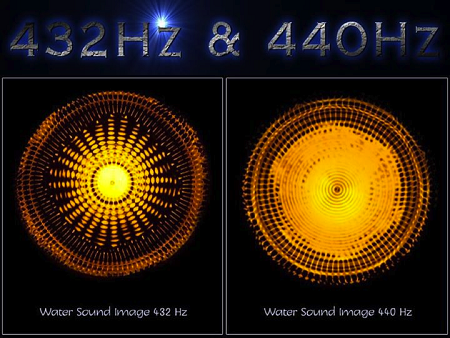

*Paste URL and run all 3 code cells*

Youtube URL you would like analyzed:

In [ ]:
video_url = ""
#Example: video_url = "https://www.youtube.com/watch?v=tMDFv5m18Pw"

Audio segment to analyze (seconds):

In [ ]:
audio_start = 0
audio_end = 600

Main

In [ ]:
# Install
!pip install yt-dlp

# Import libraries
import numpy as np
from scipy.io import wavfile
from scipy.fft import rfft, rfftfreq
import matplotlib.pyplot as plt
import matplotlib
import yt_dlp
import os

# We'll use this list to save our downloaded file name
downloaded_files = []

# Define the options for yt-dlp
options = {
    # Download only audio
    "format": "bestaudio",
    # Prefer lossless formats
    "prefer_free_formats": True,
    # Extract audio to wav format
    "postprocessors": [{
        "key": "FFmpegExtractAudio",
        "preferredcodec": "wav",
        "preferredquality": "0"
    }],
    # Pass arguments directly to FFmpeg to start from the beginning and only process 1 minute
    "postprocessor_args": ["-ss", str(audio_start), "-t", str(audio_end)],
    # Save the final path of the file to our list
    "progress_hooks": [lambda d: downloaded_files.append(d["filename"]) if d["status"] == "finished" else None],
    # Add this option to download only the video specified by the URL, not the entire playlist
    'noplaylist': True
}

# Create a yt-dlp object with the options
with yt_dlp.YoutubeDL(options) as ydl:
    # Download the video
    ydl.download([video_url])

# Set audio_file to the name of the downloaded file with '.wav'
audio_file = (os.path.splitext(downloaded_files[0])[0] if downloaded_files else None) + '.wav'

# Read the audio file
sample_rate, data = wavfile.read(audio_file)

# Perform FFT on each channel separately
print("Performing FFT...")
freqs = rfftfreq(len(data), 1/sample_rate) # Get the frequencies
fft_left = rfft(data[:, 0]) # Get the complex coefficients for left channel
fft_right = rfft(data[:, 1]) # Get the complex coefficients for right channel
mags_left = np.abs(fft_left) # Get the magnitudes for left channel
mags_right = np.abs(fft_right) # Get the magnitudes for right channel
print("FFT complete.")

#delete audio file
os.remove(audio_file)
print("Deleted",audio_file)

print("Plotting...")
# Get the default figure size
default_fig_size = matplotlib.rcParams['figure.figsize']

# Create a new figure with two subplots and the desired size and window name
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(default_fig_size[0]*2, default_fig_size[1]*2), num=os.path.basename(audio_file))

# Plot the frequency spectrum for each channel in different colors on the first subplot
ax1.plot(freqs, mags_left, color='blue', label='Left channel')
ax1.plot(freqs, mags_right, color='red', label='Right channel')
ax1.set_xlabel('Frequency (Hz)')
ax1.set_ylabel('Magnitude')
ax1.set_title('Frequency spectrum of ' + os.path.basename(audio_file))
ax1.legend()

# Limit the x-axis to the range you specified on the first subplot
ax1.set_xlim([424, 448])

# Set the x-ticks to display only the specified values on the first subplot
ax1.set_xticks([424, 432, 440, 448])

# Find the minimum and maximum magnitude values in the specified range
min_mag = min(min(mags_left[(freqs >= 424) & (freqs <= 448)]), min(mags_right[(freqs >= 424) & (freqs <= 448)]))
max_mag = max(max(mags_left[(freqs >= 424) & (freqs <= 448)]), max(mags_right[(freqs >= 424) & (freqs <= 448)]))

# Plot the same frequency spectrum on the second subplot
ax2.plot(freqs, mags_left, color='blue', label='Left channel')
ax2.plot(freqs, mags_right, color='red', label='Right channel')
ax2.set_xlabel('Frequency (Hz)')
ax2.set_ylabel('Magnitude')
ax2.set_title('Zoomed frequency spectrum of ' + os.path.basename(audio_file))
ax2.legend()

# Limit the x-axis and y-axis to the range you specified on the second subplot
ax2.set_xlim([424, 448])
ax2.set_ylim([min_mag, max_mag])

# Set the x-ticks to display only the specified values on the second subplot
ax2.set_xticks([424, 432, 440, 448])

# Add some spacing between the two graphs
fig.subplots_adjust(hspace=0.4)

# Show the actual plot on the screen
plt.show()